# **Order Set Data Analysis Big Project**
# **Lazy FCA (Formal Concept Analysis) Classifcation.**
      
**Salman Hussain :(Сальман Хуссaин)**

---




#**Importing libraries**
We begin by importing the necessary libraries for data analysis, visualization, and machine learning.


In [28]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

## **Load Titanic Dataset**

Here, we load the Titanic dataset and inspect its structure. The dataset contains information about 891 passengers across 12 columns.



In [29]:
# Load the Titanic dataset
df = pd.read_csv('titanic.csv')

# Display the first few rows
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [30]:
#Data Set Shape
df.shape

(891, 12)

# **Checking for Missing Values**

Missing values are identified in columns like `Age`, `Cabin`, and `Embarked`. These will need to be handled during preprocessing.


In [31]:
# Checking for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


# **Exploratory Data Analysis (EDA)**

This section provides insights into the dataset through statistical summaries and visualizations.

In [32]:
# 1. Exploratory Data Analysis
print("\n--- Exploratory Data Analysis ---\n")

# General dataset info
print("Dataset Info:")
df.info()


--- Exploratory Data Analysis ---

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Dataset Information

The dataset contains **891 entries** with **12 columns**. Each column represents a specific feature related to passenger characteristics and their likelihood of survival on the Titanic. Below is a detailed description of the dataset:

## General Information
- **Number of Rows:** 891  
- **Number of Columns:** 12  
- **Missing Values:**  Several columns (e.g., Age, Cabin, Embarked) have missing values, which may need imputation or handling during preprocessing.

- **Data Types:**
  - **int64**: 5 columns (e.g., PassengerId, Survived, etc.)
  - **float64**: 2 columns (Age, Fare).
  - **object**: 5 columns (Name, Sex, Ticket, Cabin, Embarked).

In [33]:
# Summary statistics
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


<ipython-input-34-556f8c84f5c8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Survived', palette='pastel')


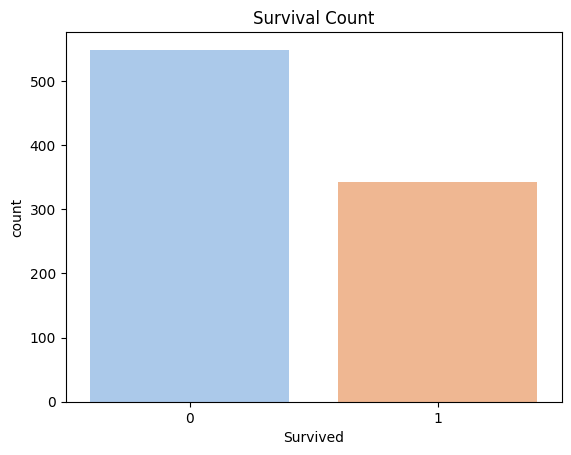

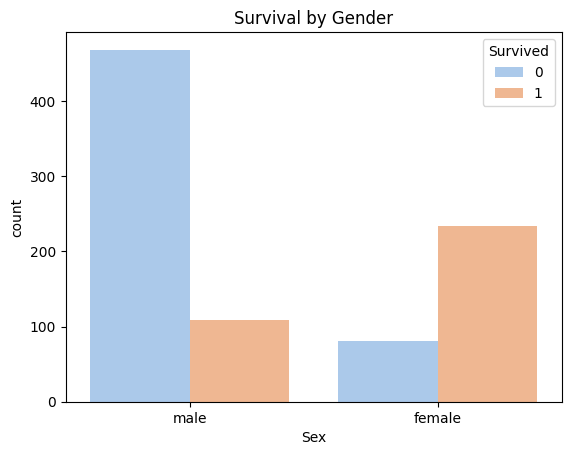

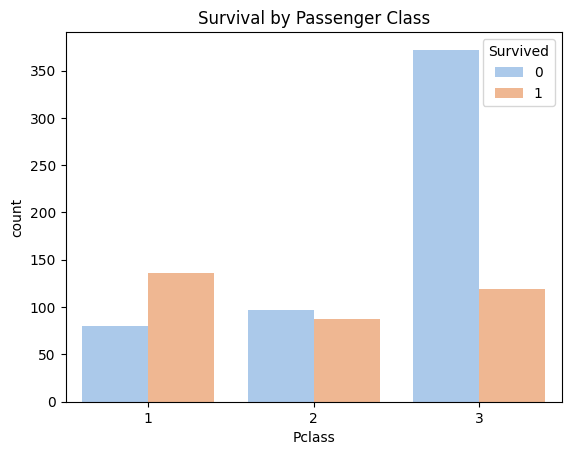

In [34]:
# Visualizing survival rate
sns.countplot(data=df, x='Survived', palette='pastel')
plt.title("Survival Count")
plt.show()

# Analyzing survival rate by gender
sns.countplot(data=df, x='Sex', hue='Survived', palette='pastel')
plt.title("Survival by Gender")
plt.show()

# Analyzing survival rate by passenger class
sns.countplot(data=df, x='Pclass', hue='Survived', palette='pastel')
plt.title("Survival by Passenger Class")
plt.show()

# **Data Cleaning and Preprocessing**

In this section, irrelevant columns are removed, and missing values are filled to ensure data integrity.


###**Dropping Irrelevant Columns**

In [35]:
# Drop irrelevant columns
columns_to_drop = ['PassengerId', 'Name', 'Ticket']
df = df.drop(columns=columns_to_drop)
print("\nDropped irrelevant columns: ", columns_to_drop)


Dropped irrelevant columns:  ['PassengerId', 'Name', 'Ticket']


###**Handling Missing Value**

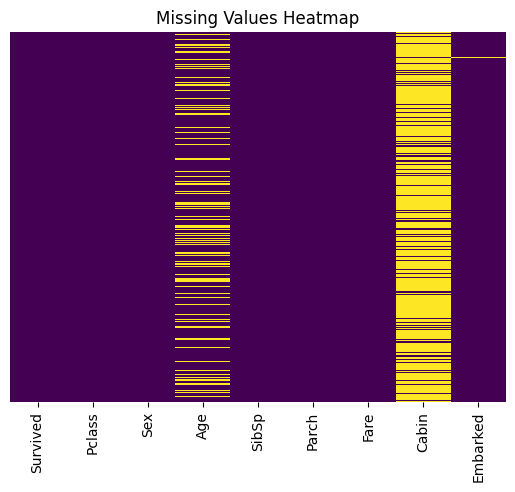

In [36]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()

In [37]:
# Fill missing values
# Filling missing Age with the median
df['Age'] = df['Age'].fillna(df['Age'].median())

# Filling missing Embarked with the most frequent value
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Filling missing Cabin information with "No_Cabin"
df['Cabin'] = df['Cabin'].fillna('No_Cabin')

print("\nDataset after filling missing values:")
display(df.head())


Dataset after filling missing values:


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,No_Cabin,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,No_Cabin,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,No_Cabin,S


In [38]:
# Checking for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
Embarked    0
dtype: int64


#**Feature Binarization**
Feature binarization transforms dataset features into a binary format or categorical format suitable for machine learning.

###**Transformation Details**:
- **Survived**: Already binary (0 = did not survive, 1 = survived).  
- **Pclass**: One-hot encoded into separate columns for each class.  
- **Sex**: Binary-encoded (1 = male, 0 = female).  
- **Age**: Binned into age groups (`<18`, `18-35`, `36-60`, `>60`).  
- **SibSp & Parch**: Kept as is (numeric).  
- **Fare**: Binned into ranges (`<10`, `10-50`, `>50`).  
- **Embarked**: One-hot encoded for ports (`S`, `C`, `Q`).  
- **Cabin**: Binary-encoded based on whether a cabin number is present or not.  



###**Why Binarization?**
Binarization:
- Simplifies categorical data for models requiring numerical input.
- Reduces the dimensionality of features while preserving meaningful distinctions.


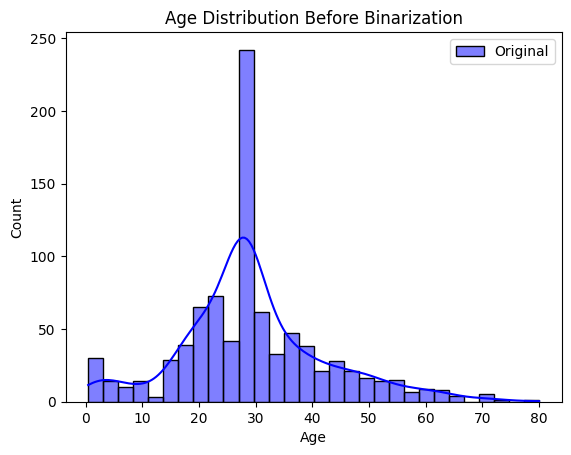

In [39]:
# Before binarization
sns.histplot(df['Age'], kde=True, color='blue', bins=30, label='Original')
plt.title('Age Distribution Before Binarization')
plt.legend()
plt.show()

In [40]:
# Binarizing Sex
df['Sex_male'] = (df['Sex'] == 'male').astype(int)
df['Sex_female'] = (df['Sex'] == 'female').astype(int)

# Binning Sbling into categories
df['SibSp_0'] = (df['SibSp'] < 0).astype(int)
df['SibSp_1'] = (df['SibSp'] >= 1).astype(int)

# Binning Prach into categories
df['Parch_yes'] = (df['Parch'] > 0).astype(int)
df['Parch_no'] = (df['Parch'] <= 0).astype(int)

# Binarizing Pclass
df['Pclass_1'] = (df['Pclass'] == 1).astype(int)
df['Pclass_2'] = (df['Pclass'] == 2).astype(int)
df['Pclass_3'] = (df['Pclass'] == 3).astype(int)

# Encoding categorical variables
df['Sex'] = df['Sex'].map({'male': 1, 'female': 0})
df['Embarked_S'] = (df['Embarked'] == 'S').astype(int)
df['Embarked_C'] = (df['Embarked'] == 'C').astype(int)
df['Embarked_Q'] = (df['Embarked'] == 'Q').astype(int)

# Binning Age into categories
df['Age_less_18'] = (df['Age'] < 18).astype(int)
df['Age_18_to_35'] = ((df['Age'] >= 18) & (df['Age'] <= 35)).astype(int)
df['Age_36_to_60'] = ((df['Age'] > 35) & (df['Age'] <= 60)).astype(int)
df['Age_greater_60'] = (df['Age'] > 60).astype(int)

# Binning Fare into categories
df['Fare_less_10'] = (df['Fare'] < 10).astype(int)
df['Fare_10_to_50'] = ((df['Fare'] >= 10) & (df['Fare'] <= 50)).astype(int)
df['Fare_greater_50'] = (df['Fare'] > 50).astype(int)

# Creating a feature to indicate if Cabin information exists
df['Has_Cabin'] = (df['Cabin'] != 'No_Cabin').astype(int)

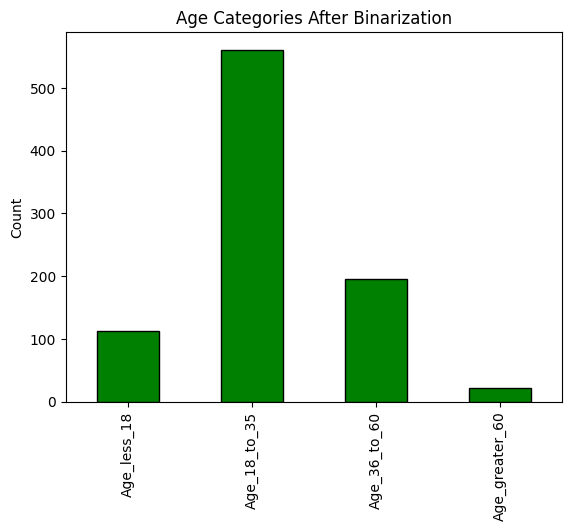

In [41]:
# After binarization
binarized_age = df[['Age_less_18', 'Age_18_to_35', 'Age_36_to_60', 'Age_greater_60']]
binarized_age.sum().plot(kind='bar', color='green', edgecolor='black')
plt.title('Age Categories After Binarization')
plt.ylabel('Count')
plt.show()

In [42]:
# Dropping the original Cabin and Embarked columns
df = df.drop(columns=['Sex','Parch', 'SibSp', 'Pclass','Cabin', 'Embarked', 'Age', 'Fare'])

print("Binarized Dataset:")
display(df.head())

Binarized Dataset:


,Survived,Sex_male,Sex_female,SibSp_0,SibSp_1,Parch_yes,Parch_no,Pclass_1,Pclass_2,Pclass_3,...,Embarked_C,Embarked_Q,Age_less_18,Age_18_to_35,Age_36_to_60,Age_greater_60,Fare_less_10,Fare_10_to_50,Fare_greater_50,Has_Cabin
0,0,1,0,0,1,0,1,0,0,1,...,0,0,0,1,0,0,1,0,0,0
1,1,0,1,0,1,0,1,1,0,0,...,1,0,0,0,1,0,0,0,1,1
2,1,0,1,0,0,0,1,0,0,1,...,0,0,0,1,0,0,1,0,0,0
3,1,0,1,0,1,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,1
4,0,1,0,0,0,0,1,0,0,1,...,0,0,0,1,0,0,1,0,0,0


##**Save the Transformed Dataset**
The binarized dataset is saved in CSV format for further use.  
This ensures that the transformed data is accessible for training machine learning models.

In [43]:
# Save the binarized dataset to a new CSV
binarized_file_path = "binarized_titanic.csv"
df.to_csv(binarized_file_path, index=False)
print(f"Binarized dataset saved to {binarized_file_path}.")

Binarized dataset saved to binarized_titanic.csv.


In [44]:
df.columns

Index(['Survived', 'Sex_male', 'Sex_female', 'SibSp_0', 'SibSp_1', 'Parch_yes',
       'Parch_no', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_S',
       'Embarked_C', 'Embarked_Q', 'Age_less_18', 'Age_18_to_35',
       'Age_36_to_60', 'Age_greater_60', 'Fare_less_10', 'Fare_10_to_50',
       'Fare_greater_50', 'Has_Cabin'],
      dtype='object')

# **Splitting Data for Training and Testing**

This section involves:
1. Importing necessary metrics and functions for model evaluation.
2. Splitting the dataset into features (`X`) and target (`y`).
3. Dividing the dataset into training and testing sets with an 80-20 split ratio.

The `train_test_split` method ensures that the data is divided randomly, and the `random_state` parameter provides reproducibility.

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

# Split features and target
X = df.drop('Survived', axis=1)
y = df['Survived']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)  # Display the shape of the training feature set
print(y_train.shape)  # Display the shape of the training target set
print(X_test.shape)   # Display the shape of the test feature set
print(y_test.shape)   # Display the shape of the test target set

(712, 20)
(712,)
(179, 20)
(179,)


# **Lazy FCA Classifier Implementation**

This section introduces the Lazy FCA Classifier, a custom implementation designed to classify data points based on the intersections of positive and negative contexts. The following steps are included:

1. **Classifier Creation**:
   - The classifier inherits from `BaseEstimator` and `ClassifierMixin` to ensure compatibility with scikit-learn workflows.
   - The `fit` method splits data into positive (`C+`) and negative (`C−`) contexts based on the target labels.

2. **Intersection Calculation**:
   - A helper function `_calculate_intersection` is implemented to compute the similarity of test examples with the positive and negative contexts.

3. **Prediction**:
   - The `predict` method scores the test samples by comparing them with the contexts and assigns classes based on weighted scores.

4. **Evaluation Metrics**:
   - Standard metrics like accuracy, precision, and recall are imported for performance evaluation.

The implementation highlights the logic of the Lazy FCA algorithm, preparing it for training and testing.


In [46]:
# Implement Lazy FCA Classifier
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.utils.class_weight import compute_class_weight
from sklearn.utils import resample
from sklearn.metrics import classification_report


class LazyFCAClassifier(BaseEstimator, ClassifierMixin):
    def fit(self, X, y):
        """
        Fit the classifier by splitting the data into positive (C+) and negative (C−) contexts.
        """
        self.C_plus = X[y == 1].to_numpy(dtype=object)
        self.C_minus = X[y == 0].to_numpy(dtype=object)
        self.feature_names = X.columns
        return self

    def _calculate_intersection(self, g, C):
        """
        Calculate intersections of a test example `g` with context `C`.
        Use tolerance for numeric features.
        """
        numeric_tolerance = 0.2  # Dynamic tolerance for numeric features
        matches = (np.abs(C - g) <= numeric_tolerance) | (C == g) | (C == None)
        return np.sum(matches, axis=1)

    def predict(self, X_test):
        """
        Predict the class for each test example.
        """
        predictions = []
        for g in X_test.to_numpy(dtype=object):
            # Compute intersections with positive and negative contexts
            pos_intersections = self._calculate_intersection(g, self.C_plus)
            neg_intersections = self._calculate_intersection(g, self.C_minus)

            # Classification rule: Weighted scoring of matches
            pos_score = np.mean(pos_intersections)
            neg_score = np.mean(neg_intersections)

            predictions.append(1 if pos_score > neg_score else 0)

        return np.array(predictions)

### **Training and Evaluating Lazy FCA Classifier**

1. Train the Lazy FCA Classifier using the training dataset.
2. Predict the target values for the test dataset.
3. Evaluate the classifier's performance using accuracy, precision, and recall metrics.

In [47]:
# Train Lazy FCA Classifier
clf = LazyFCAClassifier()
clf.fit(X_train, y_train)

# Predict on test data
y_pred = clf.predict(X_test)

# Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, zero_division=0))
print("Recall:", recall_score(y_test, y_pred, zero_division=0))

Accuracy: 0.7486033519553073
Precision: 0.7457627118644068
Recall: 0.5945945945945946


# **Classifier Evaluation**

The performance of the Lazy FCA Classifier is evaluated using standard metrics.


- Extract confusion matrix values: True Positive, True Negative, False Positive, False Negative.
- Calculate various evaluation metrics including Specificity, NPV, FPR, FDR, Accuracy, Precision, Recall, and F1 Score.
- Display the results for each metric.



In [48]:
# Evaluation Metrics
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

metrics = {
    "True Positive": tp,
    "True Negative": tn,
    "False Positive": fp,
    "False Negative": fn,
    "Specificity (TNR)": tn / (tn + fp),
    "Negative Predictive Value (NPV)": tn / (tn + fn),
    "False Positive Rate (FPR)": fp / (fp + tn),
    "False Discovery Rate (FDR)": fp / (tp + fp),
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred),
    "Recall (TPR)": recall_score(y_test, y_pred),
    "F1 Score": f1_score(y_test, y_pred),
}

# Display Results
print("Evaluation Metrics:")
for metric, value in metrics.items():
    print(f"{metric}: {value:.2f}")

Evaluation Metrics:
True Positive: 44.00
True Negative: 90.00
False Positive: 15.00
False Negative: 30.00
Specificity (TNR): 0.86
Negative Predictive Value (NPV): 0.75
False Positive Rate (FPR): 0.14
False Discovery Rate (FDR): 0.25
Accuracy: 0.75
Precision: 0.75
Recall (TPR): 0.59
F1 Score: 0.66


# **Model Evaluation and Metrics Calculation**

- This section evaluates multiple classifiers, including K-Nearest Neighbor, Naive Bayes, Logistic Regression, SVM, Decision Tree, Random Forest, XGBoost, and Lazy FCA Classifier.
- For each model, the function `calculate_metrics` computes various evaluation metrics such as Accuracy, Precision, Recall, F1 Score, Specificity, NPV, FPR, and FDR.
- The results for each classifier are displayed after evaluation.



In [49]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


# Metrics calculation function
def calculate_metrics(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    npv = tn / (tn + fn) if (tn + fn) > 0 else 0
    fpr = fp / (fp + tn) if (fp + tn) > 0 else 0
    fdr = fp / (fp + tp) if (fp + tp) > 0 else 0
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, zero_division=0)
    recall = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred)

    return {
        "True Positive": tp,
        "True Negative": tn,
        "False Positive": fp,
        "False Negative": fn,
        "True Negative Rate (Specificity)": specificity,
        "Negative Predictive Value": npv,
        "False Positive Rate": fpr,
        "False Discovery Rate": fdr,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall (True Positive Rate)": recall,
        "F1 Score": f1
    }

# Define classifiers
classifiers = {
    "K Nearest Neighbor": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(probability=True),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(use_label_ecncoder=False,eval_metric='logloss', random_state=42),
    "Lazy FCA Classifier": LazyFCAClassifier()
}

# Train, predict, and evaluate each model
results = {}
for name, clf in classifiers.items():
    print(f"Evaluating {name}...")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    metrics = calculate_metrics(y_test, y_pred)
    results[name] = metrics

    print(f"\nMetrics for {name}:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value}")
    print("\n")

Evaluating K Nearest Neighbor...

Metrics for K Nearest Neighbor:
  True Positive: 50
  True Negative: 96
  False Positive: 9
  False Negative: 24
  True Negative Rate (Specificity): 0.9142857142857143
  Negative Predictive Value: 0.8
  False Positive Rate: 0.08571428571428572
  False Discovery Rate: 0.15254237288135594
  Accuracy: 0.8156424581005587
  Precision: 0.847457627118644
  Recall (True Positive Rate): 0.6756756756756757
  F1 Score: 0.7518796992481203


Evaluating Naive Bayes...

Metrics for Naive Bayes:
  True Positive: 56
  True Negative: 81
  False Positive: 24
  False Negative: 18
  True Negative Rate (Specificity): 0.7714285714285715
  Negative Predictive Value: 0.8181818181818182
  False Positive Rate: 0.22857142857142856
  False Discovery Rate: 0.3
  Accuracy: 0.7653631284916201
  Precision: 0.7
  Recall (True Positive Rate): 0.7567567567567568
  F1 Score: 0.7272727272727273


Evaluating Logistic Regression...

Metrics for Logistic Regression:
  True Positive: 54
  True

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [01:38:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_ecncoder" } are not used.

  warnings.warn(smsg, UserWarning)



Metrics for Lazy FCA Classifier:
  True Positive: 44
  True Negative: 90
  False Positive: 15
  False Negative: 30
  True Negative Rate (Specificity): 0.8571428571428571
  Negative Predictive Value: 0.75
  False Positive Rate: 0.14285714285714285
  False Discovery Rate: 0.2542372881355932
  Accuracy: 0.7486033519553073
  Precision: 0.7457627118644068
  Recall (True Positive Rate): 0.5945945945945946
  F1 Score: 0.6616541353383458




## Converting Results into a DataFrame

The results of model evaluations are stored in a dictionary. To better analyze and display these results, we convert the dictionary into a pandas DataFrame. The DataFrame will have models as rows and evaluation metrics (e.g., accuracy, precision, recall) as columns.

The following code converts the `results` dictionary into a DataFrame, resets the index to ensure the model names are displayed as a column, and renames the column for better clarity.


In [50]:
# Convert the results dictionary into a DataFrame
metrics_df = pd.DataFrame(results).T.reset_index()
metrics_df.rename(columns={"index": "Model"}, inplace=True)
metrics_df

,Model,True Positive,True Negative,False Positive,False Negative,True Negative Rate (Specificity),Negative Predictive Value,False Positive Rate,False Discovery Rate,Accuracy,Precision,Recall (True Positive Rate),F1 Score
0,K Nearest Neighbor,50.0,96.0,9.0,24.0,0.914286,0.800000,0.085714,0.152542,0.815642,0.847458,0.675676,0.751880
1,Naive Bayes,56.0,81.0,24.0,18.0,0.771429,0.818182,0.228571,0.300000,0.765363,0.700000,0.756757,0.727273
2,Logistic Regression,54.0,87.0,18.0,20.0,0.828571,0.813084,0.171429,0.250000,0.787709,0.750000,0.729730,0.739726
3,SVM,49.0,95.0,10.0,25.0,0.904762,0.791667,0.095238,0.169492,0.804469,0.830508,0.662162,0.736842
4,Decision Tree,52.0,92.0,13.0,22.0,0.876190,0.807018,0.123810,0.200000,0.804469,0.800000,0.702703,0.748201
5,Random Forest,54.0,92.0,13.0,20.0,0.876190,0.821429,0.123810,0.194030,0.815642,0.805970,0.729730,0.765957
6,XGBoost,54.0,95.0,10.0,20.0,0.904762,0.826087,0.095238,0.156250,0.832402,0.843750,0.729730,0.782609
7,Lazy FCA Classifier,44.0,90.0,15.0,30.0,0.857143,0.750000,0.142857,0.254237,0.748603,0.745763,0.594595,0.661654


## Visualizing Model Evaluation Metrics

The following bar chart compares different classification models based on their evaluation metrics. The models evaluated include:

- K Nearest Neighbor
- Naive Bayes
- Logistic Regression
- SVM
- Decision Tree
- Random Forest
- XGBoost
- Lazy FCA Classifier

Each model's performance is evaluated based on:

- Accuracy
- Precision
- Recall (True Positive Rate)
- F1 Score

The results are visualized using a bar chart for an easy comparison of the different metrics across the models.

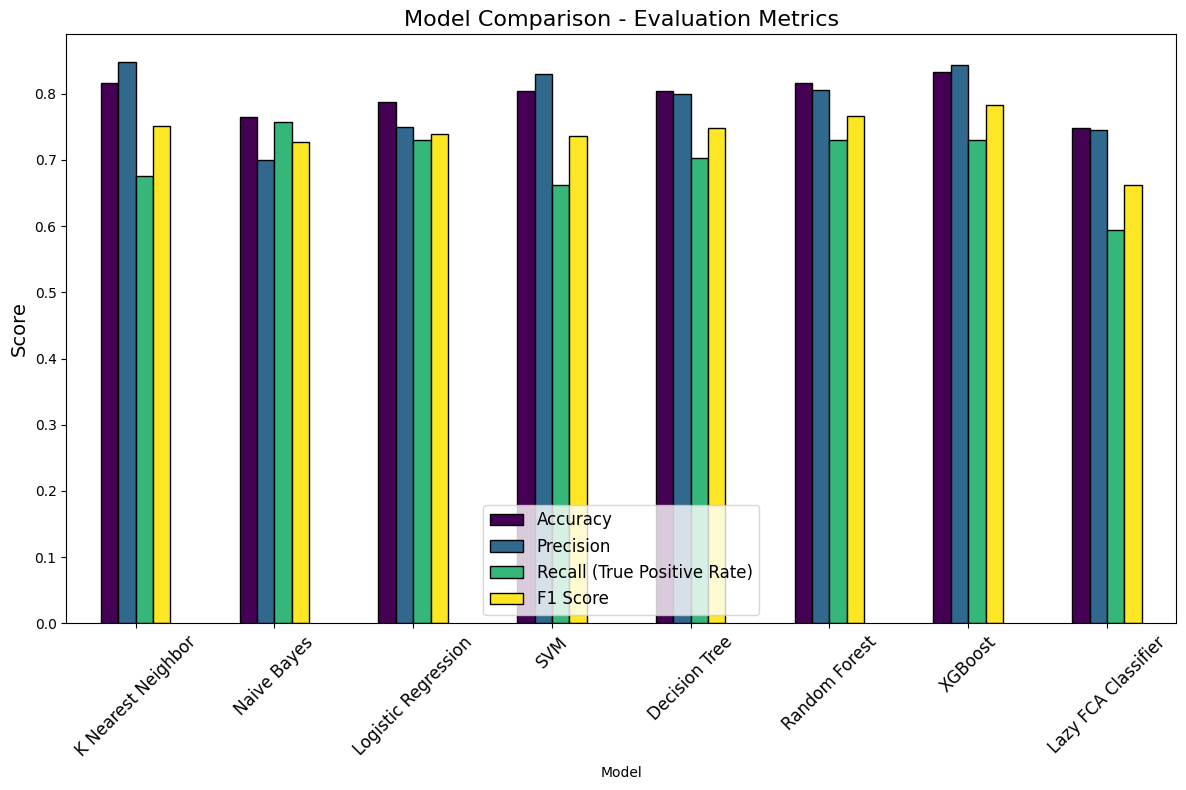

In [51]:
comparison_metrics = metrics_df[["Model", "Accuracy", "Precision", "Recall (True Positive Rate)", "F1 Score"]].set_index("Model")

comparison_metrics.plot(kind='bar', figsize=(12, 8), colormap='viridis', edgecolor='black')
plt.title('Model Comparison - Evaluation Metrics', fontsize=16)
plt.ylabel('Score', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.legend(fontsize=12,  loc='lower center')
plt.tight_layout()
plt.show()

### **Visual Comparison of Classifier Accuracies**

The following plot presents the comparison of accuracy scores across different classifiers, including the **LazyFCAClassifier**.


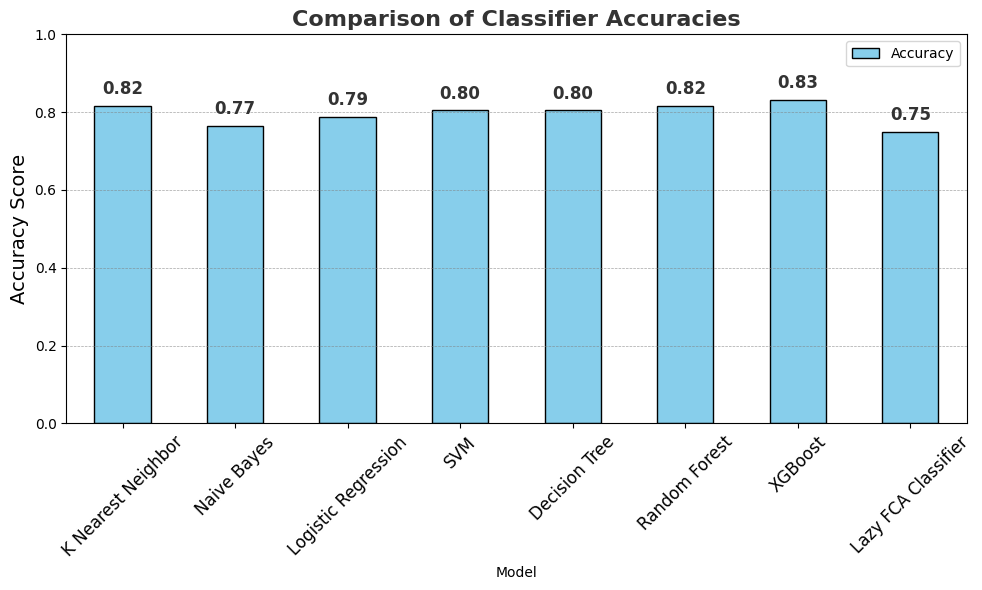

In [52]:
# Extract accuracy for visualization
accuracy_df = metrics_df[["Model", "Accuracy"]].set_index("Model")

# Plot accuracy
ax = accuracy_df.plot(kind='bar', figsize=(10, 6), color='skyblue', edgecolor='black')

# Display accuracy score on top of each bar
for bar in ax.patches:
    accuracy = bar.get_height()  # Get the accuracy value for the current bar
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.02,
             f'{accuracy:.2f}', ha='center', va='bottom', fontsize=12, fontweight='bold', color='#333333')

# Add labels and titles
plt.title('Comparison of Classifier Accuracies', fontsize=16, fontweight='bold', color='#333333')
plt.ylabel('Accuracy Score', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.ylim(0, 1)  # Set y-axis range from 0 to 1 for better context
# Improve layout
plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7, color='gray')
plt.tight_layout()
# Display the plot
plt.show()